In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#import dataset
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
df.shape

(506, 14)

In [10]:
X=df.drop('medv',axis=1)
y=df['medv']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((354, 13), (152, 13))

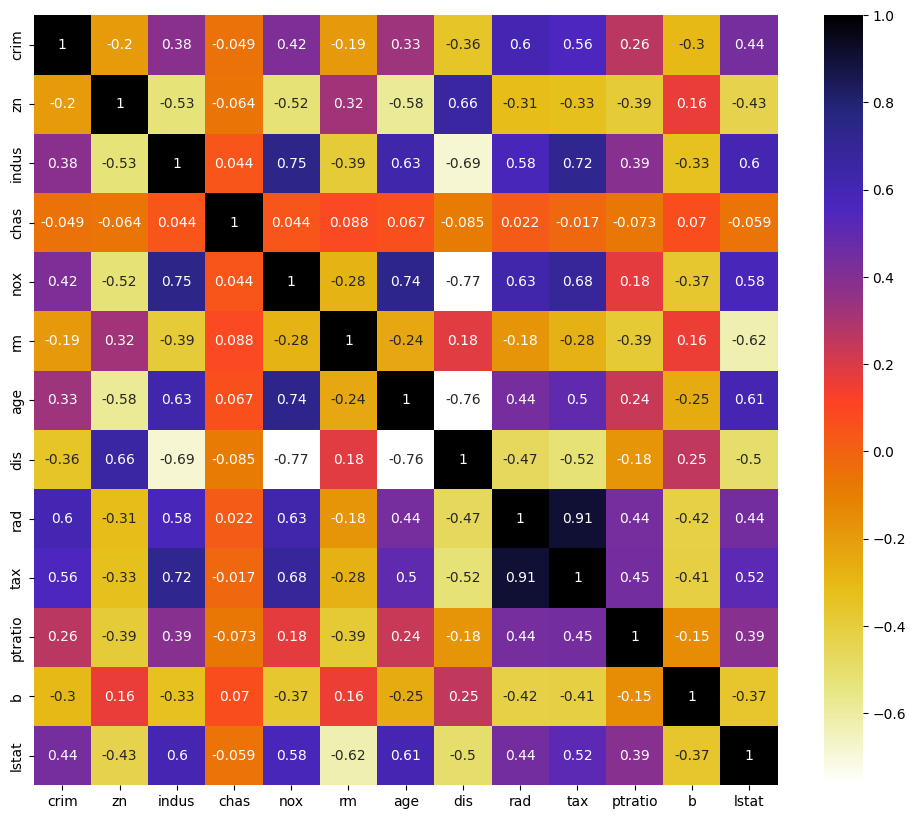

In [14]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
#the function select highly correleated features
#it will remove the first feature that is correlated with anything other feature

def correlation(dataset,threshold):
  col_corr=set() # Set of al the names of correlated columns and no duplicate name stored
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i, j])>threshold: #only absolute coeff values
       colname=corr_matrix.columns[i] #getting the name of the column
       col_corr.add(colname)
  return col_corr


In [19]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

3

In [20]:
corr_features

{'age', 'nox', 'tax'}

In [21]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,crim,zn,indus,chas,rm,dis,rad,ptratio,b,lstat
329,0.06724,0.0,3.24,0,6.333,5.2146,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,1.1691,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,3.3633,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,1.7028,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5.0141,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,1.9356,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,1.4261,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,3.3175,4,18.4,396.90,4.54
